In [1]:
%%html
<img src="images/sklearn-workflow-title.png"/>

In [2]:
%%html
<img src="images/sklearn-ml-map.png"/>

# 0. An end-to-end Scikit Learn Workflow (sklearn)

### 1. Get the Data Ready

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Create Feature Matrix (X)

In [5]:
X=heart_disease.drop("target", axis=1)

##### Create Label Matrix (Y)

In [6]:
Y=heart_disease["target"]

### 2. Choose the Right Model/Algoritm/Estimator and Hyperparameters

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf=RandomForestClassifier(n_estimators=100)
# Keep Default Hyperparameters

In [9]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit the Model to Training Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [12]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [13]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1


In [14]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2


In [15]:
y_preds= clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [16]:
Y_test

37     1
174    0
55     1
106    1
52     1
      ..
151    1
24     1
29     1
233    0
162    1
Name: target, Length: 61, dtype: int64

### 4. Evaluate The Model

In [17]:
clf.score(X_train,Y_train)

1.0

In [18]:
clf.score(X_test,Y_test)

0.7540983606557377

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        25
           1       0.82      0.75      0.78        36

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.76        61



In [21]:
confusion_matrix(Y_test,y_preds)

array([[19,  6],
       [ 9, 27]], dtype=int64)

In [22]:
accuracy_score(Y_test,y_preds)

0.7540983606557377

### 5. Improve Model

##### Try different amount of n_estimators

In [23]:
np.random.seed(42)

In [24]:
for i in range(10,100,10):
    print(f"Trying Model with {i} n_Estimator")
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,Y_train)
    y_preds=clf.predict(X_test)
    print(f"Accuracy={accuracy_score(Y_test,y_preds)}")

Trying Model with 10 n_Estimator
Accuracy=0.7540983606557377
Trying Model with 20 n_Estimator
Accuracy=0.6885245901639344
Trying Model with 30 n_Estimator
Accuracy=0.7868852459016393
Trying Model with 40 n_Estimator
Accuracy=0.7868852459016393
Trying Model with 50 n_Estimator
Accuracy=0.7377049180327869
Trying Model with 60 n_Estimator
Accuracy=0.7704918032786885
Trying Model with 70 n_Estimator
Accuracy=0.7704918032786885
Trying Model with 80 n_Estimator
Accuracy=0.819672131147541
Trying Model with 90 n_Estimator
Accuracy=0.7540983606557377


### 6. Save The Model and Load it

In [25]:
import pickle

In [26]:
pickle.dump(clf,open("Model/random_forest_model_heart-disease.pkl","wb"))

In [27]:
loaded_model=pickle.load(open("Model/random_forest_model_heart-disease.pkl","rb"))

In [28]:
loaded_model.score(X_test,Y_test)

0.7540983606557377

# 1. Getting Data Ready to TRAIN !!!!
   What we Have to DO Now:
   
    1. Split the data into features and labels (usually 'X' and 'y')
    2. Filling (also called imputing) or Disregarding missing values
    3. Converting non-numerical values to Numerical values (feature encoding)

In [29]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
X=heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 1.1 Spliting Data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.2 Make sure all data is NUMERICAL !!!!

In [33]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [34]:
from sklearn.model_selection import train_test_split
X=car_sales.drop("Price", axis=1)
y=car_sales["Price"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(transformed_X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 13), (200, 13), (800,), (200,))

In [38]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds

array([21693.24,  9987.85, 22801.95, 17440.7 , 14330.36, 17410.67,
        9301.85, 12225.59, 24567.77, 10483.52, 17516.03, 14990.48,
       14091.41, 16538.94,  8825.97, 14066.21, 18298.56, 16536.56,
       10317.69, 23690.82, 20196.4 , 21707.26, 14044.65, 31781.69,
       22595.75,  9541.44, 15272.1 ,  9356.82, 12124.94, 26301.86,
       11117.59, 11110.23,  8130.26, 15311.75, 27092.72, 13229.07,
       40892.54,  8364.96, 16852.27, 25932.61, 25662.22, 11963.85,
        9895.54, 16683.73, 12259.26, 11401.27, 16612.52, 15345.29,
       11176.89, 10787.29, 10507.32, 16216.6 , 15948.3 , 11589.04,
        7728.42, 12848.48,  9773.82, 29947.03, 17397.33, 10263.85,
       17365.28, 15016.01, 19089.25,  9675.21, 25978.59, 22501.22,
       12011.78,  8321.26, 10209.16,  9161.97, 11665.08, 21100.45,
       24199.64,  8014.74, 18566.11, 24859.26, 11667.5 , 24079.96,
       20795.62, 10414.27, 16524.41, 19551.08, 14501.48, 17609.24,
       13578.73, 10336.39, 15182.36,  9719.43, 18735.97, 17174

In [39]:
y_test.head()

807    18640
681     9492
5      23883
948    24354
147     4566
Name: Price, dtype: int64

In [40]:
model.score(X_test,y_test)

0.2330485230539474

In [41]:
for i in range (10,100,10):
    print(f"Model Estimator used : {i}")
    model=RandomForestRegressor(n_estimators=i)
    model.fit(X_train,y_train)
    print(f"Accuracy : {model.score(X_test,y_test)}")

Model Estimator used : 10
Accuracy : 0.2013844950558632
Model Estimator used : 20
Accuracy : 0.19085330403492418
Model Estimator used : 30
Accuracy : 0.2088815185900672
Model Estimator used : 40
Accuracy : 0.20880536337160183
Model Estimator used : 50
Accuracy : 0.19807846443261157
Model Estimator used : 60
Accuracy : 0.21577319189722843
Model Estimator used : 70
Accuracy : 0.19175824191416624
Model Estimator used : 80
Accuracy : 0.21168187824557105
Model Estimator used : 90
Accuracy : 0.20721944670099735


### 1.3 Now there is MISSING Data

In [42]:
car_sales_missing=pd.read_csv("data\car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [43]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1 Filling using pandas 

In [46]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [52]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2 Filling using sklearn

In [53]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Drop the rows with no label
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define Columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create a imputer (that input values)
imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                          ("door_imputer",door_imputer,door_features),
                          ("num_imputer",num_imputer,num_features)])

filled_X=imputer.fit_transform(X)
car_sales_filled=pd.DataFrame(filled_X,
                             columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(transformed_X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 15), (190, 15), (760,), (190,))

In [59]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.26037100956511683

In [60]:
t=0
ii=0
for i in range (10,100,10):
    model=RandomForestRegressor(n_estimators=i)
    model.fit(X_train,y_train)
    if model.score(X_test,y_test)>t:
        t=model.score(X_test,y_test)
        ii=i
print(f"For N_estimator = {ii} Accuracy is Maximum i.e {t*100}%")

For N_estimator = 80 Accuracy is Maximum i.e 30.17182208790371%


# 2. Choosin' Right Estimator/Model

* Sklearn refers model/algorithm as ESTIMATOR.

* Classification Problem
  * predicting a category (heart disease or not)
  * `clf` is used for classifier estimator

* Regression Problem
  * predicting a number (car price)

### 2.1 Machine Learning Model for Regression (Calisornia house DataSet)

In [61]:
from sklearn.datasets import fetch_california_housing
house=fetch_california_housing()
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [62]:
housing_df=pd.DataFrame(house["data"],
                       columns=['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])
housing_df["MedHouseVal"]=house["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### Random Forest Regression (N-small models)

In [64]:
from sklearn.model_selection import train_test_split
X=housing_df.drop("MedHouseVal",axis=1)
y=housing_df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8025306309958042

In [65]:
for i in range (10,100,10):
    model=RandomForestRegressor(n_estimators=i)
    model.fit(X_train,y_train)
    print(f"For n_estimator = {i}, Accuracy is {model.score(X_test,y_test)*100}%")

For n_estimator = 10, Accuracy is 78.29307927812714%
For n_estimator = 20, Accuracy is 79.17078163363252%
For n_estimator = 30, Accuracy is 79.68222702293694%
For n_estimator = 40, Accuracy is 79.97149115918667%
For n_estimator = 50, Accuracy is 79.80894944916027%
For n_estimator = 60, Accuracy is 80.0466508135888%
For n_estimator = 70, Accuracy is 80.12416666974659%
For n_estimator = 80, Accuracy is 80.23230257235015%
For n_estimator = 90, Accuracy is 79.97739453365574%


#### Linear Regression

In [66]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5891162573518995

### 2.2 Machine Learning Model for Classification

#### Linear SVC

In [67]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

np.random.seed(42)

X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

clf=LinearSVC()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

C:\Users\jigya\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jigya\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

#### Random FOrest Classifiers

In [69]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8360655737704918

# 3. Fit the model and use it to make pridictions

### 3.1 Fitting the Data

* X: Features, data, feature variables
* y: labels, target



`clf.fit(X_train,y_train)` fitting and training the model

### 3.2 Priding the outcomes
2 ways to pridict:
 * `predict()`
 * `predict.proba()`

#### predict()

In [70]:
y_preds=clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
np.mean(y_preds==y_test)

0.8360655737704918

In [73]:
clf.score(X_test,y_test)

0.8360655737704918

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8360655737704918

#### predict_proba()
returns an array of probabilities of labels

In [75]:
clf.predict_proba(X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [76]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

#### `predict()` can also be used for regression models.

In [77]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [78]:
#Now we can evaluate our regression model by using sklearn.metrics.mean_absolute_error which returns the average error across all samples.

# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

# 4. Evaluating a Machine Learning Model

1. Estimator Built in `score()` Method
2. The `Scoring` Parameter
3. Problem specific metrics function

### 4.1 Evaluating a model| using `score()` Method

In [79]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
# score be maximum i.e 1.0 for knowned data
clf.score(X_train,y_train)

1.0

In [81]:
clf.score(X_test,y_test)

0.8524590163934426

In [82]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [83]:
model.score(X_test,y_test)

0.8065734772187598

### 4.2 Evaluating a model using `scoring` parameters

In [84]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
clf.score(X_test,y_test)

0.8524590163934426

In [86]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [87]:
%%html
<img src="Images/Cross-Validation.png"/img>

In [88]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two (cross_val_score is preffered)
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [89]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 4.2.1.1 Accuracy

In [90]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
heart_disease=pd.read_csv("data\heart-disease.csv")

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)
np.mean(cross_val_score)

0.8248087431693989

In [92]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48087431693989%


#### 4.2.1.2 Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

##### ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [94]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [95]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

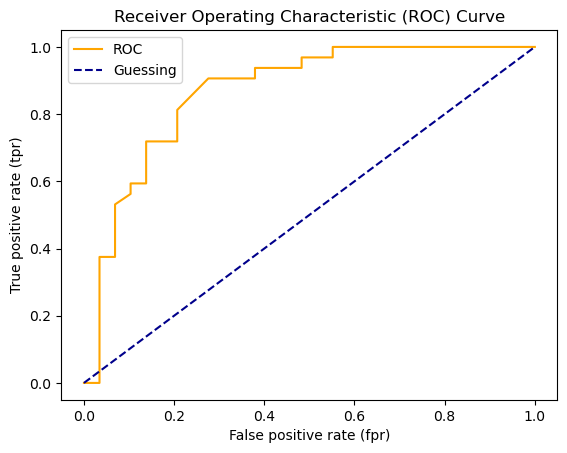

In [96]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [97]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

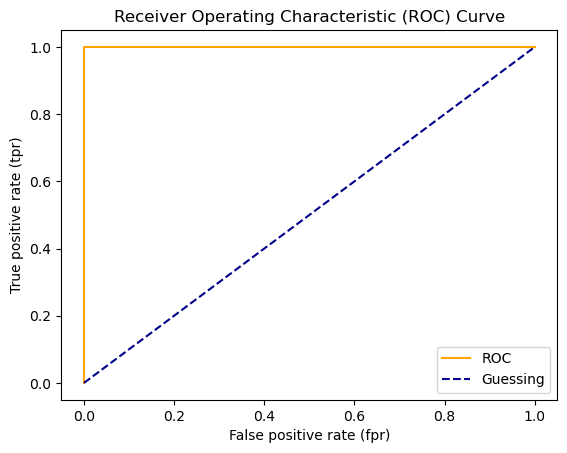

In [98]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [99]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In [100]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [101]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


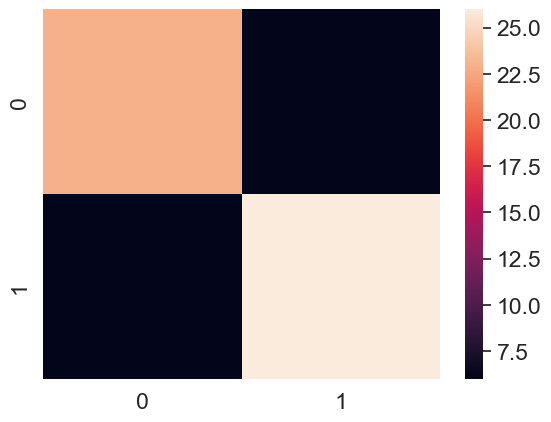

In [102]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);